## Requeriments

In [1]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns

import statsmodels.api         as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

/pip_envs/Debuggers3.6/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Uploading data (dataXid)

In [2]:
df = pd.read_csv("/mnt/workstation/data/dataXid.csv")
#PCA = pd.read_csv("/mnt/workstation/data/PCA.csv")
df

,id_cli,edad,mora_max,cant_moras_30_ult_12_meses,cant_moras_60_ult_12_meses,cant_moras_90_ult_12_meses,cupo_total_tc,codigo_ciiu,ctas_activas,ctas_embargadas,...,ocupacion_tag_gasto_familiar,ciudad_residencia_tag_gasto_familiar,rep_calif_cred_tag_gasto_familiar,estado_civil_tag_ingreso_nompen,nivel_academico_tag_ingreso_nompen,profesion_tag_ingreso_nompen,ocupacion_tag_ingreso_nompen,ciudad_residencia_tag_ingreso_nompen,rep_calif_cred_tag_ingreso_nompen,genero_tag
0,2089776.0,36.0,0.0,0.0,0.0,0.0,0.000000e+00,10.0,1.049426,0.003173,...,6,928.0,5,3,4,22,8,1178.0,6,2
1,2088434.0,33.0,3.0,0.0,0.0,0.0,0.000000e+00,10.0,1.049426,0.003173,...,8,907.0,3,2,5,40,2,966.0,5,1
2,2088089.0,34.0,1.0,0.0,0.0,0.0,0.000000e+00,8230.0,1.049426,0.003173,...,8,728.0,8,2,5,54,2,1192.0,8,2
3,4780572.0,27.0,1.0,0.0,0.0,0.0,1.328622e+07,10.0,1.049426,0.003173,...,6,428.0,3,1,5,54,8,616.0,5,2
4,3894402.0,29.0,1.0,0.0,0.0,0.0,0.000000e+00,1410.0,1.049426,0.003173,...,8,428.0,8,1,4,11,2,616.0,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092548,4772894.0,34.0,1.0,0.0,0.0,0.0,0.000000e+00,8299.0,1.049426,0.003173,...,8,428.0,5,1,5,54,2,616.0,6,1
1092549,4774849.0,25.0,0.0,0.0,0.0,0.0,0.000000e+00,10.0,1.049426,0.003173,...,6,428.0,3,3,5,54,8,616.0,5,1
1092550,4774849.0,25.0,0.0,0.0,0.0,0.0,0.000000e+00,10.0,1.049426,0.003173,...,6,428.0,3,3,5,54,8,616.0,5,1
1092551,3895049.0,30.0,0.0,0.0,0.0,0.0,1.922503e+06,10.0,1.049426,0.003173,...,6,974.0,1,2,5,54,8,1117.0,2,2


In [3]:
id_cli = df['id_cli']
df = df.drop(['id_cli'], axis=1)

In [4]:
features = pd.DataFrame(df.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
#features_i = features[features['type'] == 'int64'].index
#features_b = features[features['type'] == 'bool'].index

In [5]:
df[features_o].describe(include='all').T

,count,unique,top,freq
genero,1092553,2,M,553563
estado_civil,1092553,5,SOLTERO,605311
nivel_academico,1092553,6,UNIVERSITARIO,720807
profesion,1092553,79,OTROS,621847
ocupacion,1092553,10,Empleado,697681
ciudad_residencia,1092553,1434,BOGOTA D.C.,278442
rep_calif_cred,1092553,8,A,324135


## Correlation

Text(0.5, 1.0, 'Correlación de variables numericas')

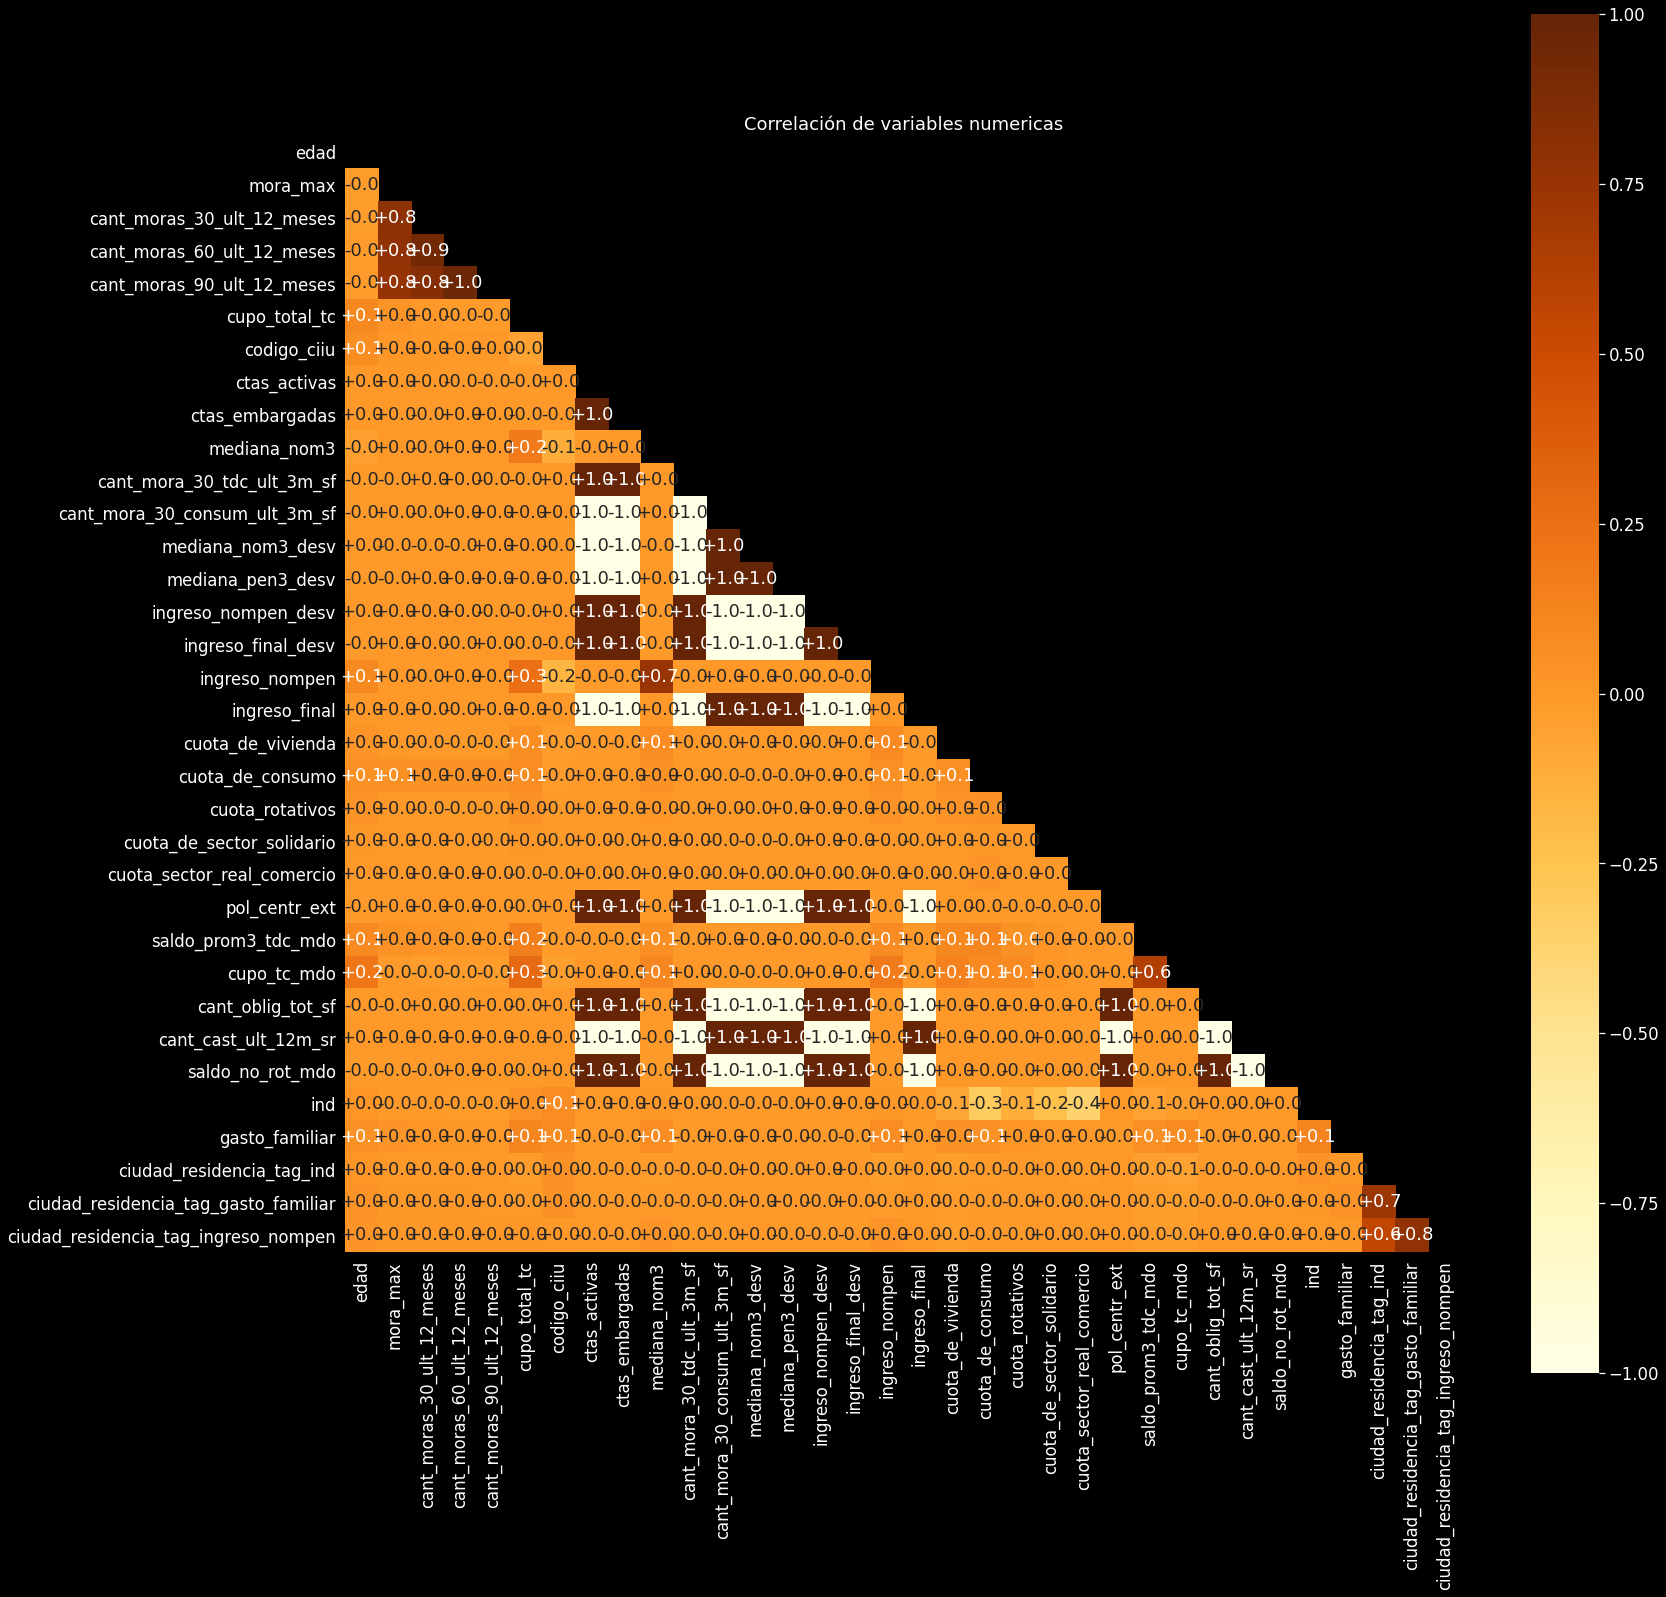

In [6]:
#plt.rcParams.update({'font.size': 13})
#compute correlation matrix
df_correlations = df[list(features_f)].corr()

#mask the upper half for visualization purposes
mask = np.zeros_like(df_correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.set(font_scale=1.5)
plt.style.use("dark_background")
plt.figure(figsize= (25,25))
sns.heatmap(df_correlations, mask=mask, cmap="YlOrBr",#"RdYlBu", 
    annot=True, square=True,
    vmin=-1, vmax=1,
    fmt="+.1f")
plt.title("Correlación de variables numericas")

In [7]:
sorted_pairs = df_correlations.unstack().sort_values(kind="quicksort", ascending = False)
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]
strong_pairs = strong_pairs[abs(sorted_pairs) < 1]
strong_pairs = pd.DataFrame(strong_pairs)
strong_pairs.columns = ['Correlation']
strong_pairs.drop_duplicates(subset=['Correlation'],inplace = True)
strong_pairs

Correlation
mediana_pen3_desv                    mediana_nom3_desv                        1.000000
                                     cant_mora_30_consum_ult_3m_sf            1.000000
cant_moras_60_ult_12_meses           cant_moras_90_ult_12_meses               0.962409
cant_moras_30_ult_12_meses           cant_moras_60_ult_12_meses               0.924841
cant_moras_90_ult_12_meses           cant_moras_30_ult_12_meses               0.843342
mora_max                             cant_moras_30_ult_12_meses               0.796979
ciudad_residencia_tag_ingreso_nompen ciudad_residencia_tag_gasto_familiar     0.786192
cant_moras_60_ult_12_meses           mora_max                                 0.783725
mora_max                             cant_moras_90_ult_12_meses               0.763659
ingreso_nompen                       mediana_nom3                             0.746805
ciudad_residencia_tag_ind            ciudad_residencia_tag_gasto_familiar     0.727138
saldo_prom3_tdc_mdo                  cupo_tc_mdo                              0.630480
ciudad_residencia_tag_ind            ciudad_residencia_tag_ingreso_nompen     0.557173
cant_oblig_tot_sf                    cant_cast_ult_12m_sr                    -1.000000

In [13]:
to_delete = ['mediana_pen3_desv',
             'cant_moras_60_ult_12_meses',
            'cant_moras_90_ult_12_meses',
            'cant_moras_30_ult_12_meses',
            'ingreso_nompen',
             'saldo_prom3_tdc_mdo',
             'cant_oblig_tot_sf',
             #'gasto_familiar',
             'ciudad_residencia_tag_ind',
             'ciudad_residencia_tag_ingreso_nompen',
            ]

## Modeling

### All variables

In [20]:
X = df.columns[~df.columns.isin(to_delete)]
y = 'gasto_familiar'

In [26]:
df[X].shape

(1092553, 58)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df[X], df[y], test_size=0.30)

In [24]:
formula = '{} ~ {}'.format(y,' + '.join(col for col in df[X].columns if col != 'gasto_familiar'))
formula

'gasto_familiar ~ edad + mora_max + cupo_total_tc + codigo_ciiu + ctas_activas + ctas_embargadas + mediana_nom3 + genero + estado_civil + nivel_academico + profesion + ocupacion + ciudad_residencia + rep_calif_cred + ind_mora_vigente + cartera_castigada + tenencia_tc + tiene_consumo + tiene_crediagil + tiene_ctas_activas + tiene_ctas_embargadas + pension_fopep + tiene_cred_hipo_1 + tiene_cred_hipo_2 + cant_mora_30_tdc_ult_3m_sf + cant_mora_30_consum_ult_3m_sf + mediana_nom3_desv + ingreso_nompen_desv + ingreso_final_desv + ingreso_final + cuota_de_vivienda + cuota_de_consumo + cuota_rotativos + cuota_de_sector_solidario + cuota_sector_real_comercio + pol_centr_ext + cupo_tc_mdo + cant_cast_ult_12m_sr + saldo_no_rot_mdo + ind + estado_civil_tag_ind + nivel_academico_tag_ind + profesion_tag_ind + ocupacion_tag_ind + rep_calif_cred_tag_ind + estado_civil_tag_gasto_familiar + nivel_academico_tag_gasto_familiar + profesion_tag_gasto_familiar + ocupacion_tag_gasto_familiar + ciudad_residenci

In [25]:
ml = smf.ols(formula, data = X_train).fit()
print(ml.summary())

                            OLS Regression Results                            
Dep. Variable:         gasto_familiar   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     44.21
Date:                Mon, 25 Jan 2021   Prob (F-statistic):               0.00
Time:                        09:26:01   Log-Likelihood:            -1.1777e+07
No. Observations:              764787   AIC:                         2.356e+07
Df Residuals:                  763343   BIC:                         2.357e+07
Df Model:                        1443                                         
Covariance Type:            nonrobust                                         
                                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [29]:
df[X].shape[1]-1

57

In [30]:
ml.pvalues[ml.pvalues < 0.05/(df[X].shape[1]-1)]

profesion[T.AUXILIAR CONTABLE]            3.280292e-04
profesion[T.AUXILIAR DE ENFERMERIA]       3.070293e-04
profesion[T.ENFERMERIA]                   3.564870e-05
profesion[T.OTROS]                        3.632080e-04
profesion[T.TRANSPORTADOR]                2.038134e-34
ocupacion[T.Desempleado sin Ingresos]     5.653951e-25
ocupacion[T.Independiente]                3.206526e-05
ocupacion[T.Pensionado]                   3.857383e-12
ciudad_residencia[T.DIBULLLA]             2.149064e-08
ciudad_residencia[T.LOBO GUERRERO]        4.672725e-06
ciudad_residencia[T.MEDIACANOA]           5.570604e-04
ciudad_residencia[T.PIEDRASENTADA]        4.948758e-19
ciudad_residencia[T.PUERTO CALDAS]        1.780385e-16
rep_calif_cred[T.B]                       3.878468e-29
rep_calif_cred[T.C]                       6.946287e-04
rep_calif_cred[T.E]                       5.190709e-05
rep_calif_cred[T.G]                       3.171459e-05
edad                                      2.657643e-17
mora_max  